<a href="https://colab.research.google.com/github/ChhaSahil/Rinex_MP/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation using K-means Clustering

Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the Data

In [ ]:
customer_data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Storing Annual_Income and Spending_Score in X

In [ ]:
X=customer_data.iloc[:,[3,4]].values

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

To choose the number of clusters we use WCSS-With Clusters Sum of Squares 

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

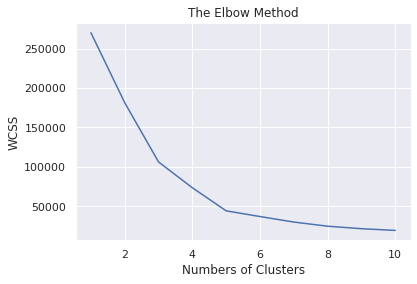

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')

The Optimum Number of Clusters=5

Training the K-Means Clustering model

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(X)

In [ ]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

Visualizing the Clusters

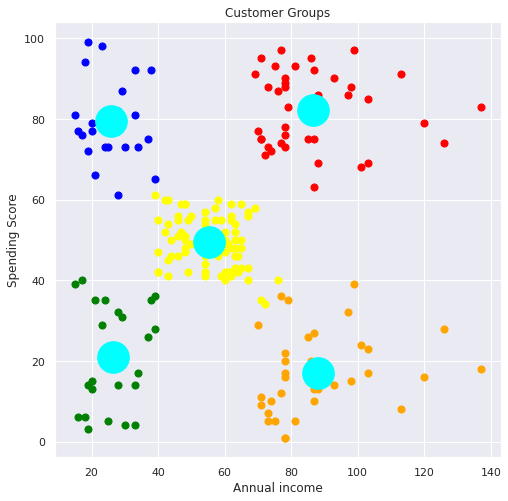

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='Orange',label='Cluster1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='Yellow',label='Cluster2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='Red',label='Cluster3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='Blue',label='Cluster4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='Green',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=1000,c='cyan',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()

#Conclusions-
Customers with annual income less than 40K and greater than 70K are either spending with a score of 60+ or with 40- Hence the Caretakers of the Mall should sort this issue by providing some membership card to keep the customers engaged with the mall.
Customers with annual income between 40K and 70K have a score between 40 and 60 which is good.

Clustering the Data based on Age and Spend-Score

In [ ]:
Y=customer_data.iloc[:,[2,4]].values

In [ ]:
Y

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [ ]:
wcss2=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(Y)
  wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS2')

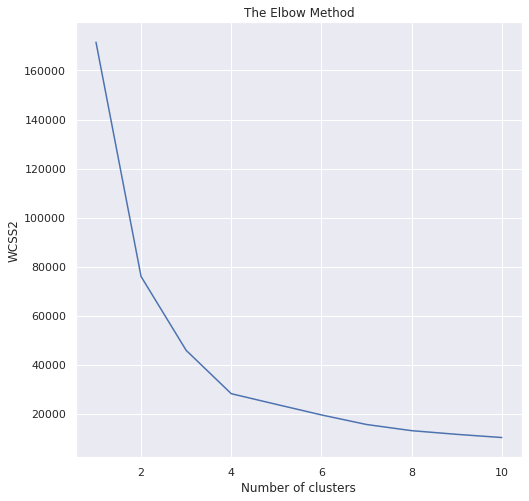

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS2')

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
x=kmeans.fit_predict(Y)



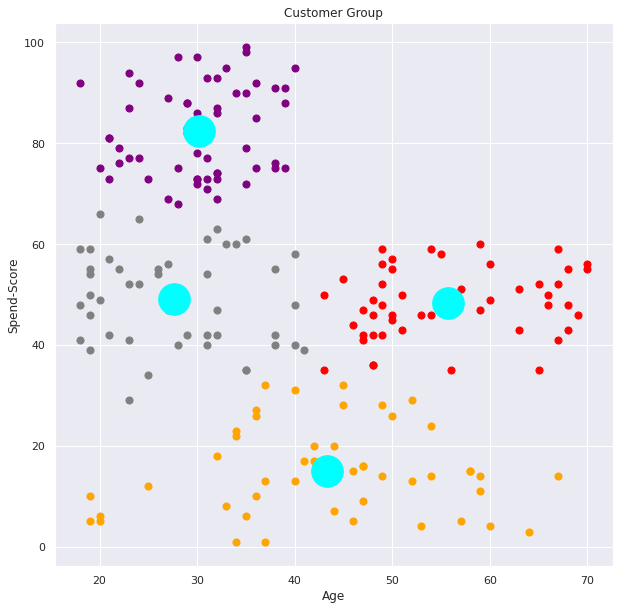

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(Y[x==0,0],Y[x==0,1],s=50,c='orange',label='Cluster1')
plt.scatter(Y[x==1,0],Y[x==1,1],s=50,c='purple',label='Cluster2')
plt.scatter(Y[x==2,0],Y[x==2,1],s=50,c='grey',label='Cluster3')
plt.scatter(Y[x==3,0],Y[x==3,1],s=50,c='red',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=1000,c='cyan',label='Centeroid')
plt.title('Customer Group')
plt.xlabel('Age')
plt.ylabel('Spend-Score')
plt.show()

#Conclusion-2

Customers with age greater than 60 have spending score between 40-60 hence aged people are more loyal towards our mall. Less than 40 years age of people are also spending at a score greater than 40. 
Only middle aged people have to targeted to increase their spend-score